In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast=pd.read_csv('Breast_cancer_data.csv')

# EDA

In [4]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
breast.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
breast.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
breast.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
breast.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

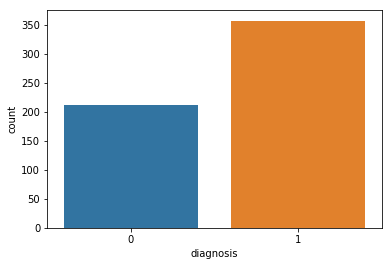

In [10]:
sns.countplot(x='diagnosis',data=breast)
plt.show()

In [11]:
breast.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

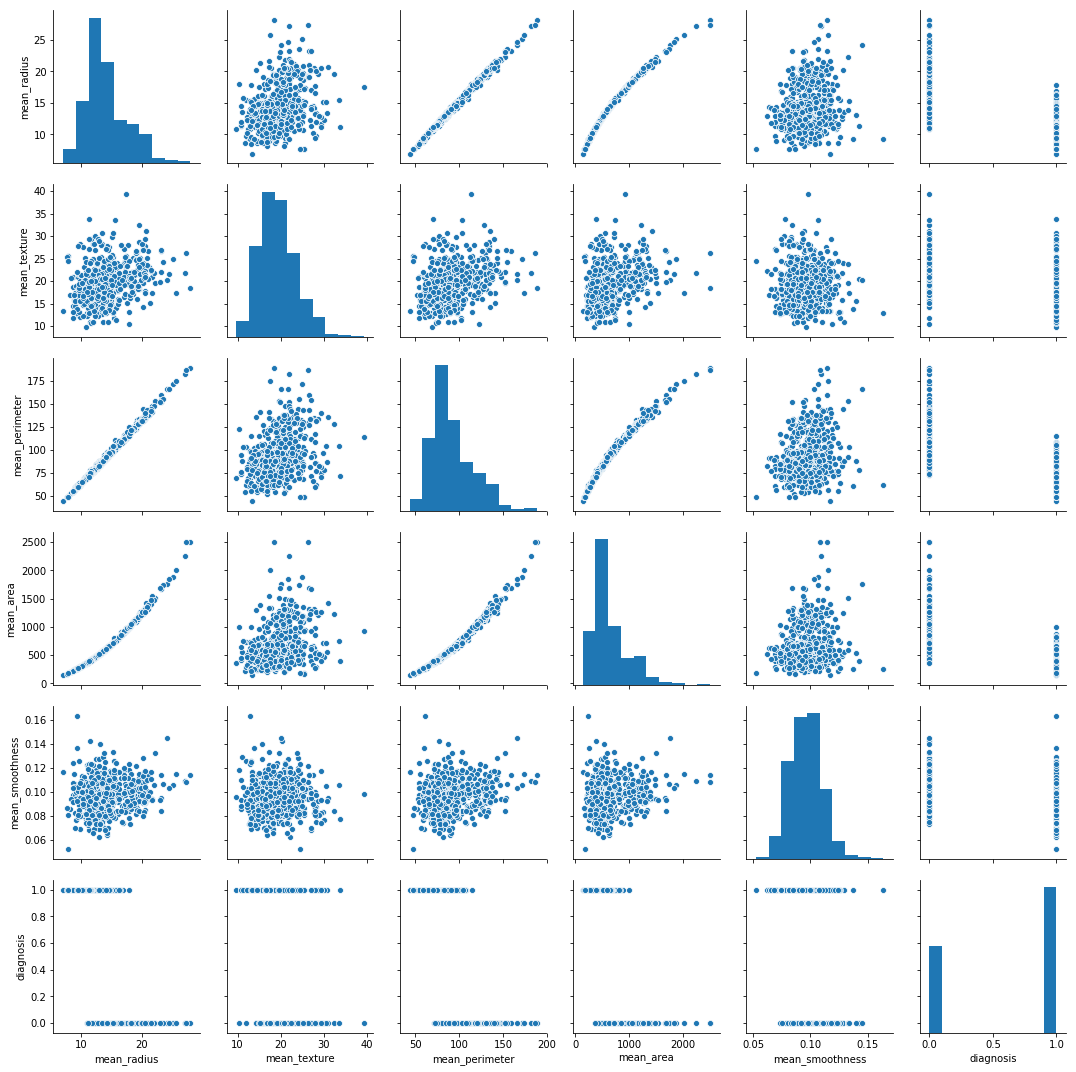

In [14]:
sns.pairplot(breast)
plt.show()

# Statsmodel - Logit

In [15]:
from statsmodels.tools import add_constant

In [16]:
breast_logit=add_constant(breast)

C:\Users\Vimesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
breast_logit.head()

,const,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0
3,1.0,11.42,20.38,77.58,386.1,0.14250,0
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0


In [18]:
import statsmodels.api as sm

In [20]:
logitmodel=sm.Logit(endog=breast_logit.diagnosis,exog=breast_logit.drop('diagnosis',axis=1)).fit()

Optimization terminated successfully.
         Current function value: 0.148702
         Iterations 10


In [22]:
print(logitmodel.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Wed, 11 Sep 2019   Pseudo R-squ.:                  0.7748
Time:                        16:28:06   Log-Likelihood:                -84.612
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                1.406e-123
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.5262      8.386      1.494      0.135      -3.909      28.962
mean_radius         6.2753      1.836      3.418      0.001       2.677       9.873
mean_texture       -0.3641      

## Since p-values for all features are less than 0.05, hence showing high statistical significance.

# Interpreting results- Odds ratio, p-values

In [50]:
para=np.exp(logitmodel.params)
para=round(para,2)

pd.DataFrame([para, logitmodel.pvalues],columns=logitmodel.params.index,index=['Odds Ratio','pvalue']).T

,Odds Ratio,pvalue
const,275453.56,1.352385e-01
mean_radius,531.26,6.300856e-04
mean_texture,0.69,1.330988e-09
mean_perimeter,0.54,7.154393e-04
mean_area,0.96,2.378888e-03
mean_smoothness,0.00,9.645541e-09


### mean_radius is highly significant

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X=breast.drop('diagnosis',axis=1)
y=breast.diagnosis

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logr=LogisticRegression()

In [58]:
pred_y=logr.fit(X_train,y_train).predict(X_test)

C:\Users\Vimesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Model Evaluation
## Accuracy

In [59]:
import sklearn.metrics

In [62]:
print('Accuracy of model is',sklearn.metrics.accuracy_score(y_test,pred_y))

Accuracy of model is 0.9122807017543859


## Confusion Matrix

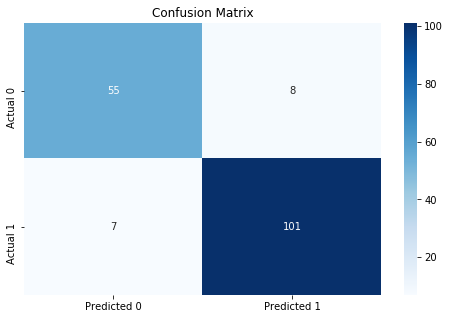

In [76]:
cm=sklearn.metrics.confusion_matrix(y_test,pred_y)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='.3g',xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'],cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [78]:
True_Postive= cm[1,1]
True_Negative=cm[0,0]
False_Positive=cm[0,1] # Type 1 Error
False_Negative=cm[1,0] #Type 2 Error 

In [83]:
Sensitivity= True_Postive/(True_Postive+False_Negative)
Specificity=True_Negative/(True_Negative+False_Positive)
print('Sensitivity is ',round(Sensitivity,2))
print('Specificity is',round(Specificity,2))

Sensitivity is  0.94
Specificity is 0.87


## Classification Report

In [82]:
print('Classification Report \n',sklearn.metrics.classification_report(y_test,pred_y))

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        63
           1       0.93      0.94      0.93       108

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



## Predicted probability of diagnosis

In [86]:
predicted_prob=logr.predict_proba(X_test)

In [88]:
predicted_prob=pd.DataFrame(predicted_prob,columns=['Prob of No cancer 0','Prob of Cancer 1'])

In [89]:
predicted_prob.head()

,Prob of No cancer 0,Prob of Cancer 1
0,0.435612,0.564388
1,0.188308,0.811692
2,0.094704,0.905296
3,0.178406,0.821594
4,0.058122,0.941878


## ROC Curve - (Receiver Operating Characteristic)

In [85]:
from sklearn.metrics import roc_curve,roc_auc_score

In [98]:
tpr,fpr,thresholds=roc_curve(y_test,predicted_prob['Prob of No cancer 0'])

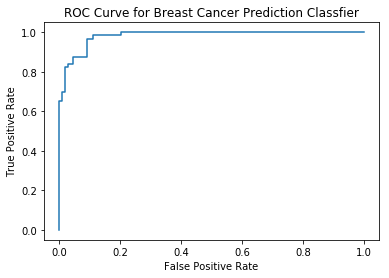

In [100]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Breast Cancer Prediction Classfier')
plt.show()


In [109]:
print('Area Under Curve is',roc_auc_score(y_test,predicted_prob['Prob of Cancer 1']))

Area Under Curve is 0.9814814814814815


# Insights

1. All the attributes are significant as they had p-value less than 0.05
2. Mean_Radius is higly significant
3. Accuracy of model is 91.2% which means data is more specific
4. Area Under Curve is 98% which is highly satisfactory

